In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plot_settings= {
    "x_min": -20.0,
    "x_max": 20.0,
    "y_min": -10.0,
    "y_max": 12.0,
    "aspect": 'equal',
    "x_ticks_step": 2,
    "y_ticks_step": 2,
    "grid_minor_alpha": 0.1,
    "grid_major_alpha": 0.5,
}

In [3]:
def new_plot(settings):
    fig, ax = plt.subplots(figsize=((settings["x_max"]-settings["x_min"])/4,(settings["y_max"]-settings["y_min"])/4))
    ax.set_aspect(settings["aspect"])
    ax.axis([settings["x_min"],settings["x_max"],settings["y_min"],settings["y_max"]])

    ax.set_xticks(np.arange(settings["x_min"],settings["x_max"]+1,settings["x_ticks_step"]))
    ax.set_yticks(np.arange(settings["y_min"],settings["y_max"]+1,settings["y_ticks_step"]))

    ax.set_xticks(np.arange(settings["x_min"],settings["x_max"]+1),minor=True)
    ax.set_yticks(np.arange(settings["y_min"],settings["y_max"]+1),minor=True)
    ax.grid(which='minor', alpha=settings["grid_minor_alpha"])
    ax.grid(which='major', alpha=settings["grid_major_alpha"])
    return fig, ax

In [4]:
def draw_plot(x,y,color,settings):
    fig, ax = new_plot(settings)
    ax.plot(x, y, color)

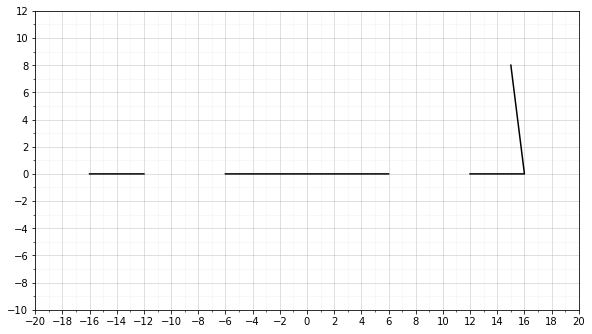

In [5]:
x_BH = [-16,-12,np.nan,-6,6,np.nan,12,16,15,np.nan]
y_BH = [0,0,np.nan,0,0,np.nan,0,0,8,np.nan]
#print(type(xBH))
draw_plot(x_BH, y_BH, 'k', plot_settings)

In [6]:
def circle(radius, x_offset, y_offset, resolution):
    t = np.linspace(0, 2*np.pi, resolution)

    x = x_offset + radius * np.cos(t)
    y = y_offset + radius * np.sin(t)

    x = np.append(x, np.nan)
    y = np.append(y, np.nan)
    return x,y

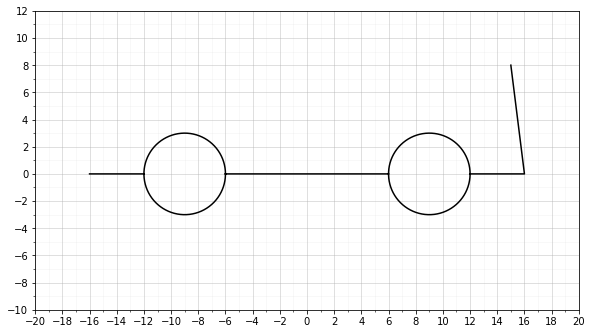

In [7]:
x_rad1,y_rad1 = circle(3, -9, 0, 1000)

x_rad2,y_rad2 = circle(3, 9, 0, 1000)

x = np.concatenate((x_BH, x_rad1, x_rad2))
y = np.concatenate((y_BH,y_rad1, y_rad2))

draw_plot(x, y, 'k', plot_settings)

In [8]:
#def trajectory(x, y, resolution):
def trajectory(points):
    X = []
    y = []
    for point in points:
        x = []
        for i in range(0, len(points)):
            x.append(np.power(point[0], i))
        X.append(x)
        y.append(point[1])

    a = np.linalg.solve(X,y)

    #x = sorted(x)
    #x = np.linspace(x[0], x[-1], resolution)
    x_out = np.arange(points[0][0], points[-1][0]+1)
    y_out = []
    for _x in x:
        _y = 0
        for i in range(0,a.size):
           _y += a[i] * np.power(_x, i)
        y.append(_y)

    x = np.append(x, np.nan)
    y = np.append(y, np.nan)
    return x_out, y_out

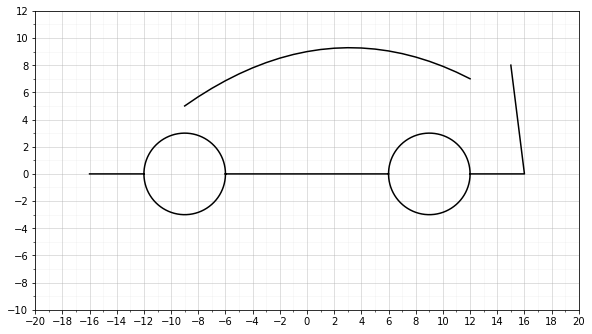

In [9]:
x_dach, y_dach = trajectory([(-9,5), (0,9), (12,7)])

x = np.concatenate((x, x_dach))
y = np.concatenate((y,y_dach))
#print(x_dach)
draw_plot(x, y, 'k', plot_settings)

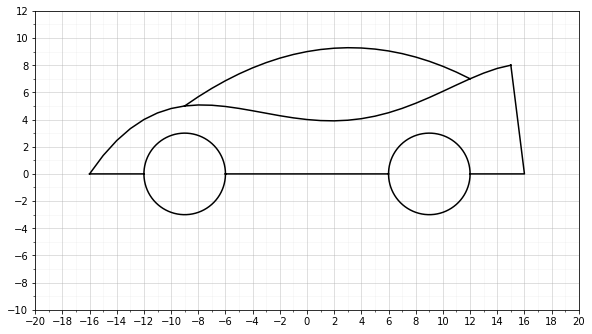

In [10]:
x_k, y_k = trajectory([(-16,0), (-12,4), (-9,5), (0,4), (12, 7), (15,8)])

x = np.concatenate((x, x_k))
y = np.concatenate((y,y_k))

draw_plot(x, y, 'k', plot_settings)

In [15]:
def transformation(x, y, degree):
    rad = degree*(np.pi/180)
    x_out = x*np.cos(rad) + y*np.sin(rad)
    y_out = - x*np.sin(rad) + y*np.cos(rad)
    return x_out, y_out

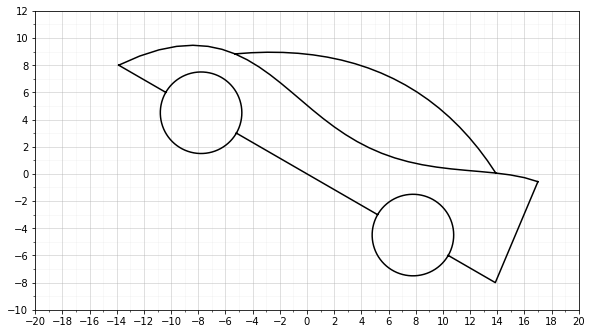

In [16]:
x_t, y_t = transformation(x, y, 30)
draw_plot(x_t, y_t, 'k', plot_settings)